# Testing Tenor Log Mel Spectrogram with Support Vector Machine
## Brass instruments included

Here we test a support vector machine on log Mel spectrogram data extracted from our WAV samles. Each log Mel spectrogram has 96 x 96 = 9,216 features, where 96 is the number of frequency bands, and 96 is the number of time slices (collections of 2,297 raw samples). So this is a lot of data.

Upstream from this notebook we extracted these features and saved them as pickles, then we read all the pickles and aggregated them into a Pandas DataFrame, again saved as a pickle. Finally, with the imported `_tenor_lms` (below) we read from this pickle, filter and reshape the data as needed, and then we scale data using `sklearn.preprocessing.StandardScaler`. At this point, data are ready to read into our notebook.

In this notebook we define, train, and test a SVM with these log Mel spectrogram data as input.

In [36]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, \
    precision_recall_curve, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, \
                                    RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import BaggingClassifier
from scipy.stats import uniform

from _common import NUM_LABEL_COLS, RANDOM_SEED
from _tenor_lmsc_brass_ok import TEST_SIZE, VALIDATION_SIZE, \
    BANDS, TIME_SLICES, master, lmss, data, target
# Note that records are read from pickle, selected, filtered,
# and scaled with `sklearn.preprocessing.StandardScaler` 
# in `_tenor_lmsc_brass_ok.py`.

In [8]:
x_train, x_test, y_train, y_test = \
     train_test_split(data, target, test_size=TEST_SIZE, random_state=RANDOM_SEED)

In [ ]:
# This will take some time to train. 3/4 hour perhaps.

In [13]:
clf = SVC(probability=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(clf.score(x_test, y_test))

0.8152580403889305


In [14]:
c_matrix = confusion_matrix(y_test, y_pred)
idx = cols = [0, 1]
pd.DataFrame(c_matrix, index=idx, columns=cols)

,0,1
0,550,133
1,114,540


In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       683
           1       0.80      0.83      0.81       654

    accuracy                           0.82      1337
   macro avg       0.82      0.82      0.82      1337
weighted avg       0.82      0.82      0.82      1337



In [16]:
# DID NOT FIND BETTER C than 1.0

In [17]:
# model_params = {
#     'C': uniform(0.1, 10.0)
# }

# RandomizedSearchCV(estimator, param_distributions, *, n_iter=10, 
#                    scoring=None, n_jobs=None, iid='deprecated', 
#                    refit=True, cv=None, verbose=0, 
#                    pre_dispatch='2*n_jobs', random_state=None, 
#                    error_score=nan, return_train_score=False)
# svm_model = SVC()
# clf = RandomizedSearchCV(svm_model, model_params, n_iter=10, cv=5)
# model = clf.fit(x_train, y_train)
# params = model.best_estimator_.get_params()

In [18]:
# params

In [19]:
# clf = SVC(C=params['C'])
# clf.fit(x_train, y_train)
# y_pred = clf.predict(x_test)
# print(clf.score(x_test, y_test))


In [20]:
# c_matrix = confusion_matrix(y_test, y_pred)
# idx = cols = [0, 1]
# pd.DataFrame(c_matrix, index=idx, columns=cols)

In [21]:
# print(classification_report(y_test, y_pred))

In [37]:
fn = './scikit_models/tenor_brass_ok_lmsc.pkl'
with open(fn, 'wb') as fh:
    pickle.dump(clf, fh)

In [23]:
model = clf
probas_pred = model.predict_proba(x_test)

In [26]:
y_true = [1 if x == '1' else 0 for x in y_test]

In [29]:
y_pred_pos = probas_pred[:, [1]]
precision, recall, threshold = precision_recall_curve(y_true, y_pred_pos)

Text(0.5, 1.0, 'Precision-Recall Curve')

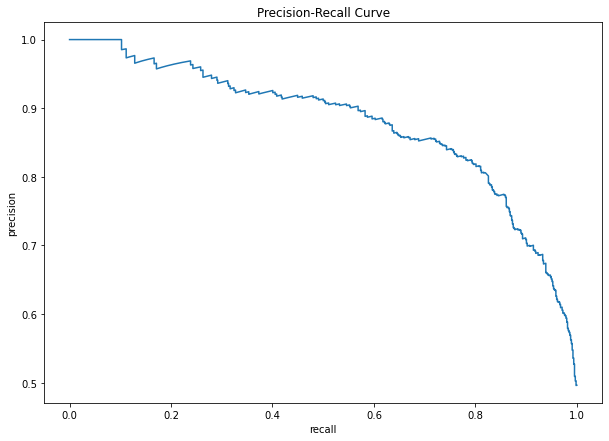

In [30]:
fig = plt.figure(figsize=(10, 7))    
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title("Precision-Recall Curve")


In [33]:
fpr, tpr, threshold = roc_curve(y_true, y_pred_pos)
auc = roc_auc_score(y_true, y_pred_pos)

Text(0.5, 1.0, 'ROC Curve: AUC = 0.884')

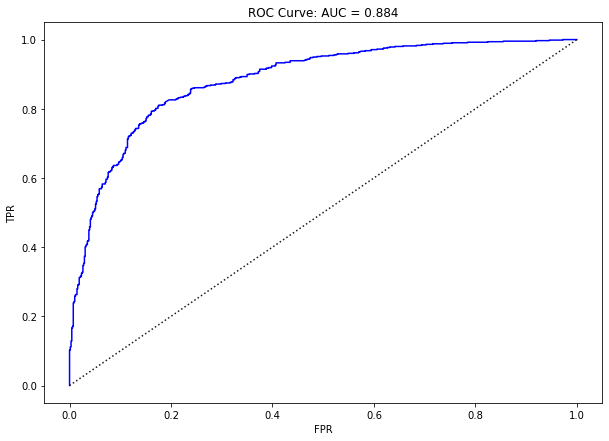

In [34]:
fig = plt.figure(figsize=(10, 7))    
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1], ':', color='0.1')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ROC Curve: AUC = {:.3f}".format(auc)) 